<a href="https://colab.research.google.com/github/Pulik1/SkillCraftTechnology/blob/main/SCT_0437_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset manually

Saving RTA Dataset.csv to RTA Dataset.csv


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

# Check the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())


       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [6]:
# Data Cleaning
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('RTA Dataset.csv')

# 1. Display unique values in the problematic column
print("Unique values in 'Service_year_of_vehicle' before cleaning:")
print(data['Service_year_of_vehicle'].unique())

# 2. Map string values to numeric equivalents
service_year_mapping = {
    'Above 10yr': 10,
    '5-10yrs': 7.5,  # Average value in range
    '2-5yrs': 3.5,   # Average value in range
    '1-2yr': 1.5,
    'Below 1yr': 0.5
}


data = data.copy()

# Map the values and handle missing values
data['Service_year_of_vehicle'] = data['Service_year_of_vehicle'].map(service_year_mapping)
data['Service_year_of_vehicle'] = data['Service_year_of_vehicle'].fillna(data['Service_year_of_vehicle'].median())

# Ensure the column is numeric
data['Service_year_of_vehicle'] = pd.to_numeric(data['Service_year_of_vehicle'])




Unique values in 'Service_year_of_vehicle' before cleaning:
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']


<ipython-input-24-101ebdcbe937>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age_band_of_driver', order=data['Age_band_of_driver'].value_counts().index, palette='coolwarm')


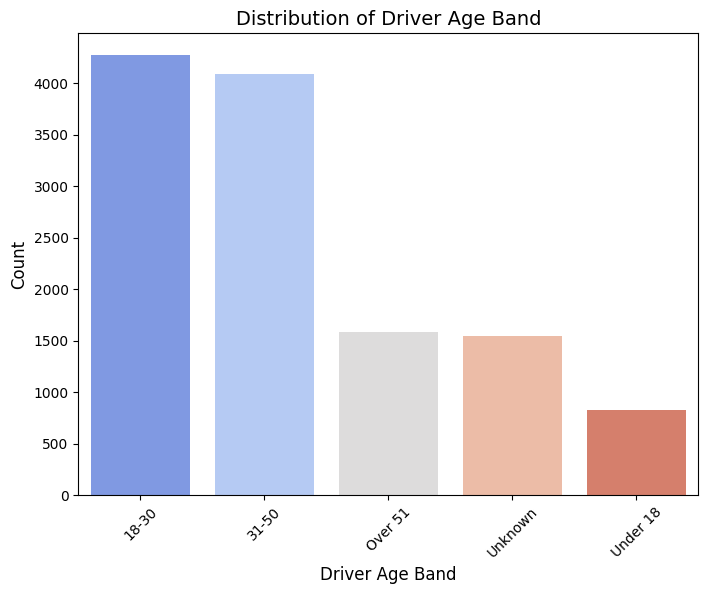

In [ ]:
# Distribution of driver age bands
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age_band_of_driver', order=data['Age_band_of_driver'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Driver Age Band', fontsize=14)
plt.xlabel('Driver Age Band', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


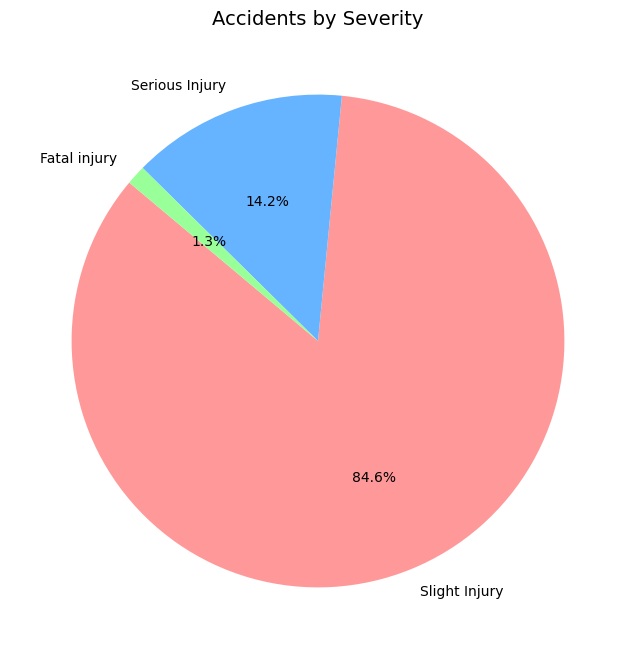

In [18]:
import matplotlib.pyplot as plt

# Aggregate the data for 'Accident_severity'
severity_counts = data['Accident_severity'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    severity_counts,
    labels=severity_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(severity_counts)]
)
plt.title('Accidents by Severity', fontsize=14)
plt.show()


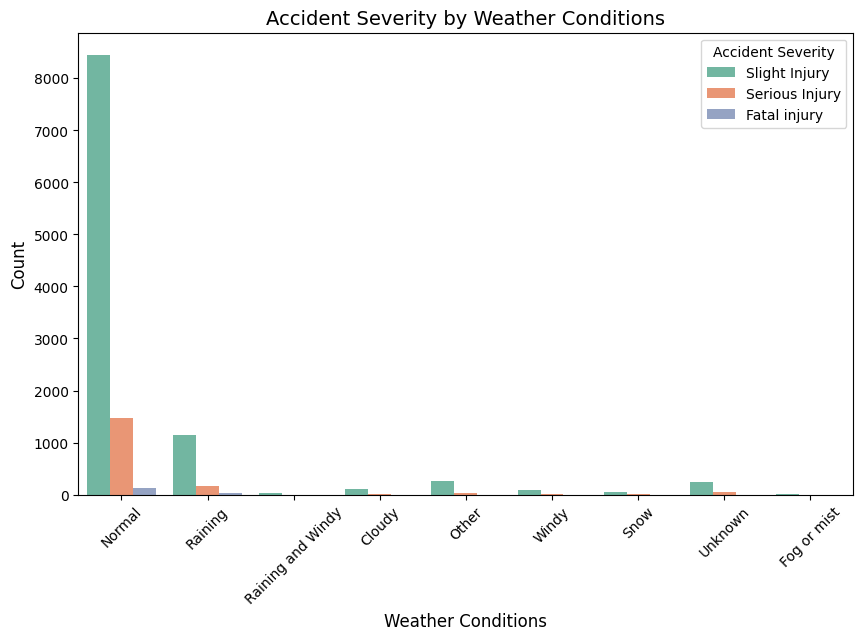

In [ ]:
# Relationship between weather conditions and accident severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_conditions', hue='Accident_severity', palette='Set2')
plt.title('Accident Severity by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accident Severity', loc='upper right')
plt.show()


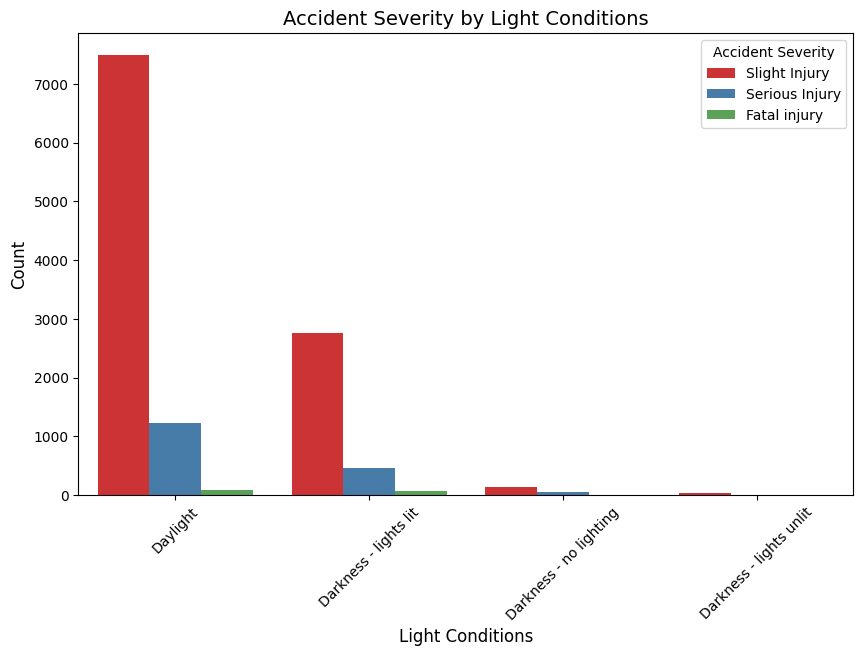

In [ ]:
# Light conditions and accident severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Light_conditions', hue='Accident_severity', palette='Set1')
plt.title('Accident Severity by Light Conditions', fontsize=14)
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accident Severity', loc='upper right')
plt.show()


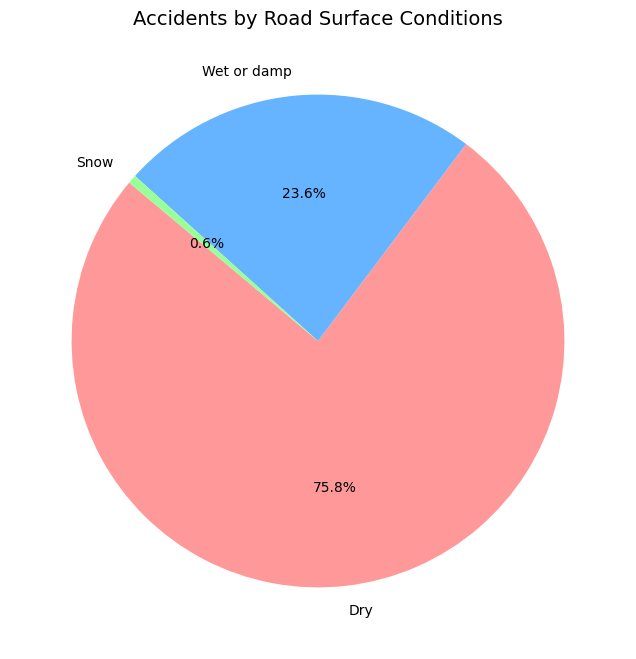

In [19]:
import matplotlib.pyplot as plt


data_cleaned = data[~data['Road_surface_conditions'].str.contains('flood over 3cm', case=False, na=False)]

# Aggregate the data for 'Road_surface_conditions'
surface_counts = data_cleaned['Road_surface_conditions'].value_counts()

# Define distinct colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    surface_counts,
    labels=surface_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(surface_counts)]
)
plt.title('Accidents by Road Surface Conditions', fontsize=14)
plt.show()


<ipython-input-29-b15ba938eb44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Area_accident_occured', order=data['Area_accident_occured'].value_counts().index, palette='pastel')


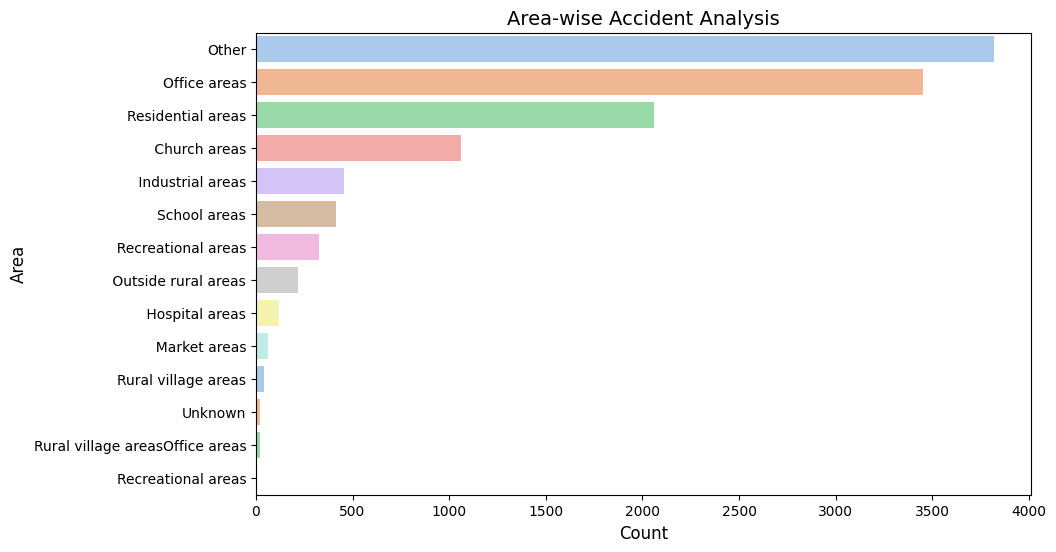

In [ ]:
# Analyze accidents based on the area
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Area_accident_occured', order=data['Area_accident_occured'].value_counts().index, palette='pastel')
plt.title('Area-wise Accident Analysis', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.show()
